# Exercise 04 - Due Friday, October 21 at 12pm

*Objectives*: Gain experience loading a CSV dataset into a database model you define yourself and using SQL to explore its contents. Explore the data by writing and executing a number of SQL queries using common syntax and functions and describing your findings.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries in the space provided, unless a text answer is requested. Results should be correct, according to the embedded tests. The notebook itself should be completely reproducible; from start to finish, another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Deadline*: Friday, October 21, 12pm. Submit your notebook to Blackboard and push it to your GitHub repository.

## Setup - obtain data and create database

The US City Open Data Census has data on [restaurant inspections from all over the country](http://us-city.census.okfn.org/dataset/food-safety).  Let's take a look at data from Albuquerque.  *Note*: metadata and other details for this dataset are available at http://data.cabq.gov/business/foodinspections/.

Fyi, to save you a step, I've converted this file into a clean CSV file by using the `dos2unix` command to change its line endings and to switch it to use commas instead of tabs using `csvformat -t inputfile.csv > outputfile.csv`.

First we download the dataset:

In [1]:
!wget https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv

--2016-10-24 12:46:51--  https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5025226 (4.8M) [text/plain]
Saving to: ‘abq-food-inspections-fy2010.csv’

abq-food-inspection 100%[=====================>]   4.79M  --.-KB/s   in 0.06s  

2016-10-24 12:46:51 (79.6 MB/s) - ‘abq-food-inspections-fy2010.csv’ saved [5025226/5025226]



## Problem 1 - examine the data (35 points)

Use `csvstat` and other tools as you see fit and observe its contents.  Review the metadata definitions linked to above.  Describe what you see:  What do all the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some complications or questions you would like to ask?

Insert a combination of code and text/markdown cells here to review the data and describe what you find.

In [8]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [9]:
!echo 'redspot' | sudo -S service postgresql restart
!createdb -U dbuser exercise4

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.
createdb: database creation failed: ERROR:  database "exercise4" already exists


In [10]:
%sql postgresql://dbuser@localhost:5432/exercise4

'Connected: dbuser@exercise4'

In [5]:
!csvcut -n abq-food-inspections-fy2010.csv
!wc -l abq-food-inspections-fy2010.csv

  1: FACILITY_NAME
  2: FACILITY_KEY
  3: SITE_ADDRESS
  4: CITY
  5: STATE
  6: ZIP
  7: OWNER_KEY
  8: OWNER_NAME
  9: NATURE_OF_BUSINESS
 10: STREET_NUMBER
 11: STREET_NAME
 12: STREET_TYPE
 13: POST_DIRECTIONAL
 14: PHONE
 15: PROGRAM_CATEGORY
 16: PROGRAM_CATEGORY_DESCRIPTION
 17: INSPECTION_DATE
 18: INSPECTION_TYPE
 19: INSPECTION_DESC
 20: SERIAL_NUM
 21: ACTION_CODE
 22: ACTION_DESC
 23: RESULT_CODE
 24: RESULT_DESC
 25: VIOLATION_CODE
 26: VIOLATION_DESC
 27: INSPECTION_MEMO
17557 abq-food-inspections-fy2010.csv


##### Description of the Columns:
1: FACILITY_NAME: the name of facility

2: FACILITY_KEY: the unique id of facility

3: SITE_ADDRESS: the address of facility

4: CITY: city where the facility stands

5: STATE: state where the facility stands

6: ZIP: the zip of the area where the facility stands

7: OWNER_KEY: the unique id of the facility's owner

8: OWNER_NAME: the name of the owner

9: NATURE_OF_BUSINESS: the industry that the facility belongs to

10: STREET_NUMBER: the unique id of the street

11: STREET_NAME: name of the street

12: STREET_TYPE: the type of the street

13: POST_DIRECTIONAL: the post direction of the facility

14: PHONE: the phone number of the facility

15: PROGRAM_CATEGORY: id that indicates the type of facility

16: PROGRAM_CATEGORY_DESCRIPTION: Descript of the id that indicates the type of facility

17: INSPECTION_DATE: Date the inspection

18: INSPECTION_TYPE: type of the inspection

19: INSPECTION_DESC: description of the inspection

20: SERIAL_NUM:  Unique ID for the inspection daily activity

21: ACTION_CODE: Code of the action taken

22: ACTION_DESC: Description of the action taken

23: RESULT_CODE: Code of the result of the inspection

24: RESULT_DESC: Description of the result of the inspection

25: VIOLATION_CODE: The code for the violation

26: VIOLATION_DESC: the discription of the violation

27: INSPECTION_MEMO: Notes from the inspection made by the inspector

In [6]:
!csvstat abq-food-inspections-fy2010.csv

  1. FACILITY_NAME
	<class 'str'>
	Nulls: False
	Unique values: 2615
	5 most frequent values:
		SMITHS FOOD AND DRUG CENTERS INC:	154
		ISOTOPES PARK - OVATIONS:	93
		PER EHSII CECELIA GARCIA OOB LA REYNA DEL SUR:	85
		ISLETA AMPHITHEATER:	68
		ECHO INC:	68
	Max length: 77
  2. FACILITY_KEY
	<class 'int'>
	Nulls: False
	Min: 13
	Max: 101482
	Sum: 820405773
	Mean: 46730.79135338346
	Median: 50866.0
	Standard Deviation: 32659.794578837962
	Unique values: 2835
	5 most frequent values:
		46323:	93
		65863:	85
		32817:	68
		80949:	68
		91825:	66
  3. SITE_ADDRESS
	<class 'str'>
	Nulls: True
	Unique values: 2456
	5 most frequent values:
		1601 AVENIDA CESAR CHAVEZ SE:	94
		644 OLD COORS BLVD SW:	85
		8601 CENTRAL AV NE:	77
		2200 SUNPORT BLVD SE:	75
		5210 CENTRAL AV SE:	73
	Max length: 35
  4. CITY
	<class 'str'>
	Nulls: False
	Values: ALBUQUERQUE
  5. STATE
	<class 'str'>
	Nulls: False
	Values: 87, NM
  6. ZIP
	<class 'str'>
	Nulls: False
	Unique values: 48
	5 most frequent values:
		87110

According to csvstat, there are missing values of some columns, which include: SITE_ADDRESS, NATURE_OF_BUSINESS,  STREET_NUMBER, STREET_NAME, STREET_TYPE, POST_DIRECTIONAL, PHONE, PROGRAM_CATEGORY_DESCRIPTION, INSPECTION_TYPE, VIOLATION_CODE, VIOLATION_DESC, INSPECTION_MEMO

Most interested columns: RESULT_DESC,INSPECTION_DESC

 Which columns present some complications or questions you would like to ask？      How many inspections for each quarter

## Problem 2 - define a database model and load the data (35 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset into the database and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Insert a combination of code and text/markdown cells here to connect to your database, define your table, load its data, and verify the loaded records.

In [12]:
%%sql
DROP TABLE IF EXISTS E4;
CREATE TABLE E4 (
    facility_name VARCHAR(77),
    facility_key INTEGER,
    site_address VARCHAR(35),
    city VARCHAR(12),
    state VARCHAR(2),
    zip VARCHAR(10),
    owner_key INTEGER,
    owner_name VARCHAR(82),
    nature_of_business VARCHAR(25),
    street_number VARCHAR(7),
    street_name VARCHAR(24),
    street_type VARCHAR(4),
    post_directional VARCHAR(2),
    phone VARCHAR(20),
    program_category VARCHAR(4),
    program_category_description VARCHAR(40),
    inspection_date TIMESTAMP,
    inspection_type VARCHAR(10),
    inspection_desc VARCHAR(32),
    serial_num VARCHAR(9),
    action_code VARCHAR(2),
    action_decs VARCHAR(34),
    result_code VARCHAR(2),
    result_desc VARCHAR(37),
    violation_code VARCHAR(10),
    violation_desc VARCHAR(50),
    inspection_memo VARCHAR(64)
    
)

Done.
Done.


[]

In [13]:
!pwd

/home/jovyan/work


In [14]:
%%sql
COPY E4 FROM '/home/jovyan/work/abq-food-inspections-fy2010.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

17556 rows affected.


[]

In [15]:
%%sql
SELECT COUNT(*) FROM E4;

1 rows affected.


count
17556


In [11]:
%%sql
SELECT * FROM E4
LIMIT 10;

10 rows affected.


facility_name,facility_key,site_address,city,state,zip,owner_key,owner_name,nature_of_business,street_number,street_name,street_type,post_directional,phone,program_category,program_category_description,inspection_date,inspection_type,inspection_desc,serial_num,action_code,action_decs,result_code,result_desc,violation_code,violation_desc,inspection_memo
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2009-10-21 00:00:00,None,EMERGENCY RESPONSE,DA8009125,00,NON-GRADED,00,NOT APPLICABLE,68,Delivered Informational Brochure,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2009-10-21 00:00:00,None,ROUTINE FOOD INSPECTION,DA8009123,11,APPROVED,03,IN COMPLIANCE,00,No Violations Found,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2009-10-21 00:00:00,None,ROUTINE FOOD INSPECTION,DA8009123,11,APPROVED,03,IN COMPLIANCE,55,Additional Comments,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2010-04-14 00:00:00,None,ROUTINE FOOD INSPECTION,DA8010205,11,APPROVED,03,IN COMPLIANCE,00,No Violations Found,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2010-04-14 00:00:00,None,ROUTINE FOOD INSPECTION,DA8010205,11,APPROVED,03,IN COMPLIANCE,55,Additional Comments,None
2000 VIETNAM RESTAURANT,31468,601 SAN MATEO BLVD SE,ALBUQUERQUE,NM,87108,29294,2000 VIETMAN RESTAURANT,RESTAURANT,601,SAN MATEO,BLVD,SE,5052320900,0406,Food Service Establishment,2010-03-23 00:00:00,None,ROUTINE FOOD INSPECTION,DA8509472,11,APPROVED,03,IN COMPLIANCE,34,Food contact surfaces,None
2000 VIETNAM RESTAURANT,31468,601 SAN MATEO BLVD SE,ALBUQUERQUE,NM,87108,29294,2000 VIETMAN RESTAURANT,RESTAURANT,601,SAN MATEO,BLVD,SE,5052320900,0406,Food Service Establishment,2010-03-23 00:00:00,None,ROUTINE FOOD INSPECTION,DA8509472,11,APPROVED,03,IN COMPLIANCE,35,Non-Food contact surfaces,None
2000 VIETNAM RESTAURANT,31468,601 SAN MATEO BLVD SE,ALBUQUERQUE,NM,87108,29294,2000 VIETMAN RESTAURANT,RESTAURANT,601,SAN MATEO,BLVD,SE,5052320900,0406,Food Service Establishment,2010-03-23 00:00:00,None,ROUTINE FOOD INSPECTION,DA8509472,11,APPROVED,03,IN COMPLIANCE,55,Additional Comments,None
328 CHINESE CUISINE,72789,5617 MENAUL BLVD NE STE A,ALBUQUERQUE,NM,87110,66644,328 CHINESE CUISINE,None,5617,MENAUL,BLVD,NE,5058814468,0406,Food Service Establishment,2009-12-15 00:00:00,None,EMERGENCY RESPONSE,DA7757250,00,NON-GRADED,00,NOT APPLICABLE,68,Delivered Informational Brochure,None
328 CHINESE CUISINE,72789,5617 MENAUL BLVD NE STE A,ALBUQUERQUE,NM,87110,66644,328 CHINESE CUISINE,None,5617,MENAUL,BLVD,NE,5058814468,0406,Food Service Establishment,2009-12-15 00:00:00,None,ROUTINE FOOD INSPECTION,DA7757248,11,APPROVED,03,IN COMPLIANCE,00,No Violations Found,None


## Problem 3 - explore your data (30 points)

Now that the data is loaded, ask some questions of it!  Identify key variables of interest and note their ranges along with other useful descriptive statistics.  Choose and define a few lines of inquiry, execute queries for each, and describe what you find in your result sets.  Use any query techniques we've seen in class, including aggregate functions, transformations, subqueries, or others as appropriate. 

If you find interesting patterns, adding plots to your exploration would be useful.

Insert a combination of code and text/markdown cells here to explore your data.

####  Aggregate functions

Q1: Count the number of each kind of result

In [12]:
%%sql
SELECT result_desc,count(*)
FROM E4
GROUP BY result_desc;

19 rows affected.


result_desc,count
EMBARGO,3
UPGRADE,69
PERMIT SUSPENSION,2
IN COMPLIANCE,14389
PHONE CALL,90
NOT APPLICABLE,2416
VOLUNTARY CLOSURE,1
OUT OF BUSINESS,142
PERMISSION TO OPERATE,1
TRAINING RECEIVED,104


Q2: Find the top5 owners that have most facilities

In [13]:
%%sql
SELECT owner_name,count(*) as count
FROM E4
GROUP BY owner_name
ORDER BY count DESC 
LIMIT 5;

5 rows affected.


owner_name,count
APS,792
SMITHS FOOD AND DRUG CENTERS INC,321
CIRCLE K STORES INC,277
ALBERTSONS,228
WAL MART STORES EAST LP,156


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


<Container object of 5 artists>

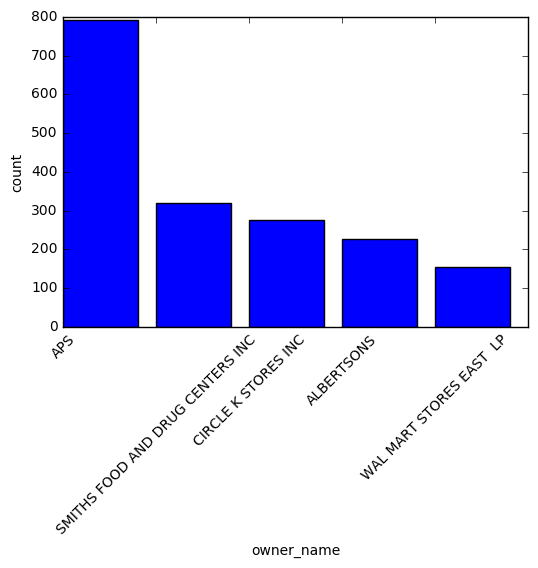

In [14]:
%matplotlib inline
result=_
result.bar()

#### Transformations

Q3：Create new table about inspection.Find out the number of inspections for each quater and show the quater which has the most one.

In [15]:
%%sql
DROP TABLE IF EXISTS inspection_days;
CREATE TABLE inspection_days (
    id SERIAL,
    inspection_date CHAR(10),
    inspection_year INTEGER,
    inspection_month INTEGER,
    inspection_day INTEGER,
    day_of_week_str CHAR(9),
    day_of_week INTEGER,
    is_weekend BOOLEAN,
    is_weekday BOOLEAN,
    hour_24 INTEGER,
    quarter INTEGER
);

Done.
Done.


[]

In [16]:
%%sql
INSERT INTO inspection_days (inspection_date, inspection_year, inspection_month, inspection_day, day_of_week_str, day_of_week,
                  is_weekend, is_weekday, hour_24, quarter)
SELECT TO_CHAR(inspection_date, 'YYYY-MM-DD') AS inspection_date, 
    CAST(TO_CHAR(inspection_date, 'YYYY') AS INTEGER) AS inspection_year,
    CAST(TO_CHAR(inspection_date, 'MM') AS INTEGER) AS inspection_month,
    CAST(TO_CHAR(inspection_date, 'DD') AS INTEGER) AS inspection_date,
    TO_CHAR(inspection_date, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(inspection_date, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(inspection_date, 'D') AS INTEGER) IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(inspection_date, 'D') AS INTEGER) NOT IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekday,
    CAST(TO_CHAR(inspection_date, 'HH24') AS INTEGER) AS hour_24,
    CAST(TO_CHAR(inspection_date, 'Q') AS INTEGER) AS quarter
FROM E4;

17556 rows affected.


[]

In [20]:
%%sql
SELECT inspection_date,
    inspection_year, 
    inspection_month, 
    inspection_day,
    quarter
FROM inspection_days
LIMIT 10
;

10 rows affected.


inspection_date,inspection_year,inspection_month,inspection_day,quarter
2009-10-21,2009,10,21,4
2009-10-21,2009,10,21,4
2009-10-21,2009,10,21,4
2010-04-14,2010,4,14,2
2010-04-14,2010,4,14,2
2010-03-23,2010,3,23,1
2010-03-23,2010,3,23,1
2010-03-23,2010,3,23,1
2009-12-15,2009,12,15,4
2009-12-15,2009,12,15,4


In [23]:
%%sql
SELECT quarter,count(*) as inspection_num
FROM inspection_days
GROUP BY quarter;

4 rows affected.


quarter,inspection_num
2,2584
1,4341
4,5468
3,5163


In [24]:
%%sql
SELECT quarter,count(*) as inspection_num
FROM inspection_days
GROUP BY quarter
ORDER BY inspection_num DESC
LIMIT 1;

1 rows affected.


quarter,inspection_num
4,5468


#### Subqueries

Q4: Find out the TOP3 facilities that have most number of inspections and also belongs to the top5 owners that have the most facilities.

In [35]:
%%sql
SELECT facility_name,count(*) as num_inspection
FROM E4
WHERE owner_name in (SELECT owner_name
                     FROM E4
                     GROUP BY owner_name
                     ORDER BY count(*) DESC 
                     LIMIT 5)
GROUP BY facility_name
ORDER BY num_inspection DESC
LIMIT 3;


3 rows affected.


facility_name,num_inspection
SMITHS FOOD AND DRUG CENTERS INC,154
CIRCLE K 8936,66
CIRCLE K 8940,61


## Bonus (10 points)

We have seen a few simple techniques for normalizing data in class.  Choose a column or set of columns that might be redundant and normalize them out to another table:

* Identify the columns to normalize in the source data table
* Create one or more new tables to hold the normalized records
* Extract data into the new tables
* Re-insert the new foreign key references from the new table into the source table


#### function checkdependency check if two columns are dependent (bijection)

found that facility_name & facility_key, owner_name&owner_key, violation_code&violation_desc, street_number&street_name
there pairs are not dependent, which means they cannot be extracted to new table


In [16]:
%%sql
CREATE OR REPLACE FUNCTION checkdependency(text,text) RETURNS text AS $$
DECLARE
    result text; 
    c1 text;
    c2 text;
    r1 boolean;
    r2 boolean;
BEGIN
    c1 := $1;
    c2 := $2;
    EXECUTE 'SELECT count(*)=0 FROM ( SELECT '|| c1 ||' FROM ( SELECT distinct('|| c1 ||'),'||c2||' FROM E4 )t1 GROUP BY '|| c1 ||' HAVING count(*)>1)t2'
        INTO r1;
    EXECUTE 'SELECT count(*)=0 FROM ( SELECT '|| c2 ||' FROM ( SELECT distinct('|| c2 ||'),'||c1||' FROM E4 )t1 GROUP BY '|| c2 ||' HAVING count(*)>1)t2'
        INTO r2;
    SELECT r1 AND r2 INTO result;
    RETURN result;
END
$$ LANGUAGE plpgsql;

Done.


[]

In [24]:
%%sql 
SELECT checkdependency('violation_code','violation_desc');

1 rows affected.


checkdependency
false


In [25]:
%%sql 
SELECT checkdependency('result_code','result_desc');

1 rows affected.


checkdependency
true


In [26]:
%%sql 
SELECT checkdependency('action_code','action_decs');

1 rows affected.


checkdependency
true


In [27]:
%%sql 
SELECT checkdependency('facility_key','facility_name');

1 rows affected.


checkdependency
false


In [28]:
%%sql 
SELECT checkdependency('owner_key','owner_name');

1 rows affected.


checkdependency
false


In [29]:
%%sql
SELECT owner_name, owner_key 
FROM E4 
WHERE owner_name='PALO ALTO INC'

146 rows affected.


owner_name,owner_key
PALO ALTO INC,42208
PALO ALTO INC,42208
PALO ALTO INC,42208
PALO ALTO INC,42208
PALO ALTO INC,42208
PALO ALTO INC,6194
PALO ALTO INC,6194
PALO ALTO INC,6194
PALO ALTO INC,6194
PALO ALTO INC,6194


In [30]:
%%sql 
SELECT checkdependency('street_number','street_name'); 

1 rows affected.


checkdependency
false


In [32]:
%%sql 
SELECT checkdependency('phone','facility_key'); 

1 rows affected.


checkdependency
false


In [33]:
%%sql 
SELECT checkdependency('program_category','program_category_description'); 

1 rows affected.


checkdependency
true


In [35]:
%%sql
DROP TABLE IF EXISTS program_category;
CREATE TABLE program_category
(
    program_category VARCHAR(4) PRIMARY KEY,
    program_category_description VARCHAR(40)
);

INSERT INTO program_category 
    SELECT distinct(program_category), program_category_description
    FROM E4

Done.
Done.
25 rows affected.


[]

In [38]:
%%sql
DROP TABLE IF EXISTS action;
CREATE TABLE action
(
    action_code VARCHAR(2) PRIMARY KEY,
    action_decs VARCHAR(34)
);

INSERT INTO action 
    SELECT distinct(action_code), action_decs
    FROM E4

Done.
Done.
8 rows affected.


[]

In [37]:
%%sql
DROP TABLE IF EXISTS result;
CREATE TABLE result
(
    result_code VARCHAR(2) PRIMARY KEY,
    result_desc VARCHAR(37)
);

INSERT INTO result 
    SELECT distinct(result_code), result_desc
    FROM E4

Done.
Done.
19 rows affected.


[]

In [39]:
%%sql
ALTER TABLE E4 DROP COLUMN action_decs;
ALTER TABLE E4 DROP COLUMN result_desc;
ALTER TABLE E4 DROP COLUMN program_category_description;

Done.
Done.
Done.


[]

In [40]:
%%sql
ALTER TABLE E4 ADD CONSTRAINT acfk FOREIGN KEY (action_code) REFERENCES action (action_code) MATCH FULL;
ALTER TABLE E4 ADD CONSTRAINT rsfk FOREIGN KEY (result_code) REFERENCES result (result_code) MATCH FULL;
ALTER TABLE E4 ADD CONSTRAINT pcfk FOREIGN KEY (program_category) REFERENCES program_category (program_category) MATCH FULL;

Done.
Done.
Done.


[]